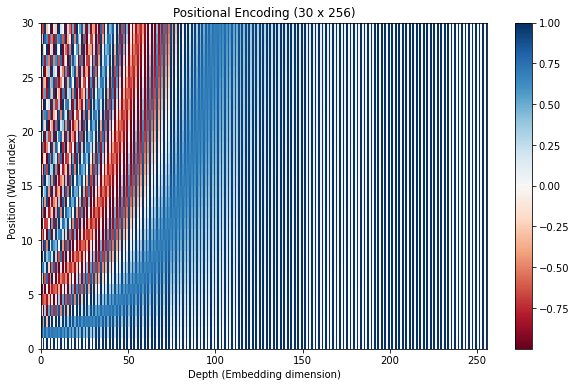

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# PositionalEncoding 클래스 재사용
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, max_seq_len, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(max_seq_len, d_model)

    def get_angles(self, pos, i, d_model):
        angles = pos / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
        return angles

    def positional_encoding(self, max_seq_len, d_model):
        angle_rads = self.get_angles(
            np.arange(max_seq_len)[:, np.newaxis],
            np.arange(d_model)[np.newaxis, :],
            d_model
        )

        # 짝수 인덱스에는 사인, 홀수 인덱스에는 코사인 적용
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

        pos_encoding = angle_rads[np.newaxis, ...]
        return tf.cast(pos_encoding, dtype=tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

# 최대 문장 길이 = 30, 임베딩 차원 = 256
sample_pos_encoding = PositionalEncoding(30, 256)

# 시각화
plt.figure(figsize=(10, 6))
plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth (Embedding dimension)')
plt.xlim((0, 256))
plt.ylabel('Position (Word index)')
plt.colorbar()
plt.title('Positional Encoding (30 x 256)')
plt.show()